In [1]:
from __future__ import division
from __future__ import unicode_literals
from __future__ import absolute_import
import pandas as pd
import numpy as np
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
#from rdkit.Avalon.pyAvalonTools import GetAvalonFP
import rdkit.rdBase
from rdkit.Chem.MACCSkeys import GenMACCSKeys
from rdkit import DataStructs
from rdkit.DataStructs import BitVectToText
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.Chem import MCS as MCS
from rdkit.Chem import Descriptors as Descriptors
from rdkit.Chem.EState import Fingerprinter
from rdkit.ML.Descriptors import MoleculeDescriptors
import pandas as pd 
from rdkit.Chem import PandasTools as PandasTools
from rdkit.Chem import Descriptors as Descriptors

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from scipy.stats import randint
from numpy import argmax
from scipy import stats

/tmp/ipykernel_176505/3470145823.py:17: DeprecationWarning: The rdkit.Chem.MCS module is deprecated; please use rdkit.Chem.rdFMCS instead.
  from rdkit.Chem import MCS as MCS


In [2]:
rdkit.__version__

'2022.09.5'

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from rdkit.Chem import DataStructs
from sklearn import datasets, linear_model
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV


In [4]:
train_data= pd.read_csv("../Train_data_liv_tox_18636.csv")

In [5]:
train_data = train_data[~train_data.Source_rank.isin([4, 9, 12])].reset_index(drop=True)
train_data

,smiles_r,TOXICITY,Source_rank,Source,Data,Mfp0,Mfp1,Mfp2,Mfp3,Mfp4,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2
0,C[C@H](N)C(=O)N[C@@H](C)C(=O)NC1[C@@H]2CN(c3nc...,1,2,"Liver Toxicity Knowledge Base (LTKB), prescrip...",LivTox,0,1,0,0,0,...,8.355850,10.869311,98.746533,558.183853,8.587444,5797.0,69.0,222.0,271.0,8.472222
1,CN(C)CCCC1c2ccccc2Nc2ccc(Cl)cc21,1,2,"Liver Toxicity Knowledge Base (LTKB), prescrip...",LivTox,0,0,0,0,0,...,0.000000,10.024244,55.050898,300.139326,7.146174,896.0,33.0,110.0,129.0,4.611111
2,NC(N)=Nc1nc(CSCCN=CNS(=O)(=O)c2ccc(Br)cc2)cs1,1,2,"Liver Toxicity Knowledge Base (LTKB), prescrip...",LivTox,0,0,0,0,0,...,6.555357,9.844533,73.704745,475.975849,11.069206,2264.0,32.0,126.0,139.0,5.791667
3,O=c1[nH]c(=O)n([C@@H]2O[C@H](CO)[C@@H](O)[C@@H...,1,2,"Liver Toxicity Knowledge Base (LTKB), prescrip...",LivTox,0,0,0,0,0,...,7.002156,9.881191,65.574603,371.961848,13.284352,573.0,30.0,94.0,113.0,4.000000
4,CN1CCCC(CN2c3ccccc3Sc3ccccc32)C1,1,2,"Liver Toxicity Knowledge Base (LTKB), prescrip...",LivTox,0,0,0,0,0,...,0.000000,10.137017,56.550528,310.150370,7.048872,982.0,36.0,120.0,143.0,4.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15075,C[C@@H](c1ncncc1F)[C@](O)(Cn1cncn1)c1ccc(F)cc1F,0,16,Reactive Metabolite Mazzolari et al,LivTox,0,1,0,0,0,...,6.259581,10.241209,73.142299,349.115045,8.951668,1359.0,41.0,132.0,157.0,5.458333
15076,COC[C@H]1OC(=O)c2coc3c2[C@@]1(C)C1=C(C3=O)[C@@...,0,16,Reactive Metabolite Mazzolari et al,LivTox,0,0,0,0,0,...,7.669962,10.959036,84.585213,428.147118,7.784493,2102.0,69.0,184.0,237.0,6.513889
15077,CCOC(=O)CN[C@@H](C(=O)N1CC[C@H]1C(=O)NCc1ccc(/...,0,16,Reactive Metabolite Mazzolari et al,LivTox,0,1,1,0,0,...,0.000000,10.360058,70.097297,473.263819,6.858896,4012.0,50.0,168.0,194.0,7.833333
15078,C=C(C)[C@@]12OC3(/C=C/C=C/CCCCC)O[C@@H]1[C@@H]...,0,16,Reactive Metabolite Mazzolari et al,LivTox,0,0,0,0,0,...,8.945724,11.424389,108.553825,648.293448,7.124104,6986.0,109.0,278.0,362.0,10.138889


In [6]:
mfp_features = train_data.columns[5:2053]
#MACCS0 should be ignored, its a dummy variable
maccs_features= train_data.columns[2054:2220]
physicochemical_features= train_data.columns[2220:2235]
mordred_features= train_data.columns[2235:]
identifiers = train_data.columns[:5]

In [7]:
maccs_features

Index(['MACCS1', 'MACCS2', 'MACCS3', 'MACCS4', 'MACCS5', 'MACCS6', 'MACCS7',
       'MACCS8', 'MACCS9', 'MACCS10',
       ...
       'MACCS157', 'MACCS158', 'MACCS159', 'MACCS160', 'MACCS161', 'MACCS162',
       'MACCS163', 'MACCS164', 'MACCS165', 'MACCS166'],
      dtype='object', length=166)

In [8]:
mfp_features

Index(['Mfp0', 'Mfp1', 'Mfp2', 'Mfp3', 'Mfp4', 'Mfp5', 'Mfp6', 'Mfp7', 'Mfp8',
       'Mfp9',
       ...
       'Mfp2038', 'Mfp2039', 'Mfp2040', 'Mfp2041', 'Mfp2042', 'Mfp2043',
       'Mfp2044', 'Mfp2045', 'Mfp2046', 'Mfp2047'],
      dtype='object', length=2048)

In [9]:
physicochemical_features

Index(['PSA', 'n_rot_bonds', 'n_rings', 'n_ar_rings', 'n_HBA', 'n_HBD', 'Fsp3',
       'logP', 'NHOHCount', 'NOCount', 'NumHeteroatoms', 'n_positive',
       '_n_negative', 'n_ring_asmbl', 'n_stereo'],
      dtype='object')

In [10]:
mordred_features

Index(['ABC', 'ABCGG', 'nAcid', 'nBase', 'nAromAtom', 'nAromBond', 'nAtom',
       'nHeavyAtom', 'nSpiro', 'nBridgehead',
       ...
       'SRW09', 'SRW10', 'TSRW10', 'MW', 'AMW', 'WPath', 'WPol', 'Zagreb1',
       'Zagreb2', 'mZagreb2'],
      dtype='object', length=595)

In [11]:
identifiers

Index(['smiles_r', 'TOXICITY', 'Source_rank', 'Source', 'Data'], dtype='object')

In [12]:
from sklearn.feature_selection import VarianceThreshold
from itertools import compress

def fs_variance(df, threshold:float=0.05):
    """
    Return a list of selected variables based on the threshold.
    """

    # The list of columns in the data frame
    features = list(df.columns)
    
    # Initialize and fit the method
    vt = VarianceThreshold(threshold = threshold)
    _ = vt.fit(df)
    
    # Get which column names which pass the threshold
    feat_select = list(compress(features, vt.get_support()))
    
    return feat_select
selected_mfp_Features = fs_variance(train_data[mfp_features], threshold=0.05)
selected_maccs_Features = fs_variance(train_data[maccs_features], threshold=0.10)
selected_mordred_features = fs_variance(train_data[mordred_features], threshold=0.10)

print(len(selected_mfp_Features))
print(len(selected_maccs_Features))
print(len(selected_mordred_features))

93
100
346


In [13]:
print(len(list(identifiers)))
print(len(list(selected_mordred_features)))
print(len(list(selected_mfp_Features)))
print(len(list(selected_maccs_Features)))
print(len(list(physicochemical_features)))

5
346
93
100
15


In [14]:
all_features = list(identifiers)+ list(selected_mordred_features)  +list(selected_mfp_Features)+  list(selected_maccs_Features)+  list(physicochemical_features)
all_features

['smiles_r',
 'TOXICITY',
 'Source_rank',
 'Source',
 'Data',
 'ABC',
 'ABCGG',
 'nAcid',
 'nBase',
 'nAromAtom',
 'nAromBond',
 'nAtom',
 'nHeavyAtom',
 'nBridgehead',
 'nHetero',
 'nH',
 'nC',
 'nN',
 'nO',
 'nS',
 'nF',
 'nCl',
 'nBr',
 'nX',
 'ATS0dv',
 'ATS1dv',
 'ATS2dv',
 'ATS3dv',
 'ATS4dv',
 'ATS5dv',
 'ATS6dv',
 'ATS7dv',
 'ATS8dv',
 'ATS0d',
 'ATS1d',
 'ATS2d',
 'ATS3d',
 'ATS4d',
 'ATS5d',
 'ATS6d',
 'ATS7d',
 'ATS8d',
 'ATS0Z',
 'ATS1Z',
 'ATS2Z',
 'ATS3Z',
 'ATS4Z',
 'ATS5Z',
 'ATS6Z',
 'ATS7Z',
 'ATS8Z',
 'AATS0dv',
 'AATS0d',
 'AATS0Z',
 'ATSC0dv',
 'ATSC1dv',
 'ATSC2dv',
 'ATSC3dv',
 'ATSC4dv',
 'ATSC5dv',
 'ATSC6dv',
 'ATSC7dv',
 'ATSC8dv',
 'ATSC0d',
 'ATSC1d',
 'ATSC2d',
 'ATSC3d',
 'ATSC4d',
 'ATSC5d',
 'ATSC6d',
 'ATSC7d',
 'ATSC8d',
 'ATSC0Z',
 'ATSC1Z',
 'ATSC2Z',
 'ATSC3Z',
 'ATSC4Z',
 'ATSC5Z',
 'ATSC6Z',
 'ATSC7Z',
 'ATSC8Z',
 'AATSC0dv',
 'AATSC0Z',
 'BalabanJ',
 'BertzCT',
 'nBonds',
 'nBondsO',
 'nBondsS',
 'nBondsD',
 'nBondsA',
 'nBondsM',
 'nBondsKS',
 

In [15]:
len(all_features)

559

In [16]:
train_data = train_data[all_features]

In [17]:
for i in train_data.Source_rank.unique():
    
    print(i)
    print(train_data[train_data["Source_rank"]==i]["TOXICITY"].value_counts()[1])
    #print(len(train_data[train_data["Source_rank"]==i])

2
77
3
933
5
203
6
410
7
2112
8
466
10
71
11
286
14
354
15
874
16
118


In [18]:
train_data[["Source_rank","Source"]].drop_duplicates().reset_index(drop=True)

,Source_rank,Source
0,2,"Liver Toxicity Knowledge Base (LTKB), prescrip..."
1,3,"human hepatotoxicity, hepatobiallry, literaty..."
2,5,"rats, chronic oral administration, Hepatic his..."
3,6,"hepatocellular hypertrophy, rats, ORAD, HESS, ..."
4,7,Preclinical hepatotoxicity data from PharmaPen...
5,8,"large-scale and diverse DILI dataset, Shuaibin..."
6,10,US drug-induced liver injury network (DILIN) ...
7,11,"transient liver function abnormalities, advers..."
8,11,"HLADE, five serum enzyme markers of liver toxi..."
9,14,BESP Bile Salt Export Pump Inhibition


In [19]:
from collections import Counter

In [20]:
all_sources_list = [ 2,  3,  5,  6,  7,  8,  10, 11, 14, 15, 16]
all_sources_list

[2, 3, 5, 6, 7, 8, 10, 11, 14, 15, 16]

In [21]:
#Predict all other datasets with models built on one of the individual Liv datasets

list_of_lists=[]
import pickle

for i in all_sources_list: 
    
    print(i)
    
    classifier = pickle.load(open(f"../bestlivmodel_{i}_model.sav", 'rb'))
    
    for j in all_sources_list:
        
        print(j)
        
        df_heldouttest = train_data[train_data["Source_rank"]==j]
        y_heldouttest = np.array(df_heldouttest['TOXICITY'])
   
        features_heldouttest= df_heldouttest.drop(["TOXICITY", "smiles_r", "Source_rank", "Source", "Data"] , axis = 1)
        feature_list_heldouttest = list(features_heldouttest.columns)
        X_heldouttest = np.array(features_heldouttest)

    
        print(len(X_heldouttest[0]))
        print(len(y_heldouttest))
        print('y_heldouttest dataset shape %s' % Counter(y_heldouttest))

        
        y_proba = classifier.predict_proba(X_heldouttest)[:,1]
            
        # calculate roc curves
        fpr, tpr, thresholds = roc_curve(y_heldouttest, y_proba)
        # get the best threshold
        J = tpr - fpr
        ix = argmax(J)
        best_thresh_cp = thresholds[ix]
        print('Best Threshold=%f' % (best_thresh_cp))
    
        #Comapre for held out test set
       
        y_pred  = [ 1 if x>best_thresh_cp  else 0 for x in y_proba ]

        print(len(y_proba))
        print(len(y_heldouttest))
        print(len(y_pred))
        
        conf_matrix = confusion_matrix(y_heldouttest, y_pred)
        print(conf_matrix)
        print(classification_report(y_heldouttest, y_pred))
        ba= balanced_accuracy_score(y_heldouttest, y_pred)
        print('balanced_accuracy_score ',ba)
        mcc= matthews_corrcoef(y_heldouttest, y_pred)
        print('matthews_corrcoef ',mcc)

        # Sensitivity, hit rate, recall, or true positive rate
        Sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
        # Specificity or true negative rate
        Specificity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
        
        f1= metrics.f1_score(y_heldouttest, y_pred)
        pos_LR = Sensitivity / (1 - Specificity) 
        ppv= metrics.precision_score(y_heldouttest, y_pred, average='binary')

        print("Sensitivity", Sensitivity)
        print("Specificity", Specificity)
        print("f1", f1)
        print("LR+", pos_LR)
        print("ppv", ppv)

        average_precision_score=metrics.average_precision_score(y_heldouttest, y_proba)
        print("average_precision_score", average_precision_score)
        
        
        auc=roc_auc_score(y_heldouttest, y_proba)
        print("roc_auc_score", auc)    
        # calculate roc curves
        #best_model_fpr, best_model_tpr, _ = roc_curve(y_heldouttest, y_proba)
        # plot the roc curve for the model
        #plt.plot(best_model_fpr, best_model_tpr, label='Our Model')
        #plt.xlabel('False Positive Rate')
        #plt.ylabel('True Positive Rate')
        #plt.legend()
        #plt.show()  
        
        row = [i, j, ba, mcc, auc, Sensitivity, Specificity, f1, pos_LR, ppv, average_precision_score]
        list_of_lists.append(row)
    

2
2
554
103
y_heldouttest dataset shape Counter({1: 77, 0: 26})
Best Threshold=0.543785
103
103
103
[[26  0]
 [ 5 72]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        26
           1       1.00      0.94      0.97        77

    accuracy                           0.95       103
   macro avg       0.92      0.97      0.94       103
weighted avg       0.96      0.95      0.95       103

balanced_accuracy_score  0.9675324675324675
matthews_corrcoef  0.8855777831757421
Sensitivity 1.0
Specificity 0.935064935064935
f1 0.9664429530201343
LR+ 15.399999999999995
ppv 1.0
average_precision_score 0.9979638517337416
roc_auc_score 0.9935064935064934
3
554
1582
y_heldouttest dataset shape Counter({1: 933, 0: 649})
Best Threshold=0.693247
1582
1582
1582
[[430 219]
 [374 559]]
              precision    recall  f1-score   support

           0       0.53      0.66      0.59       649
           1       0.72      0.60      0.65       933

    ac

Best Threshold=0.564807
1582
1582
1582
[[642   7]
 [ 38 895]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       649
           1       0.99      0.96      0.98       933

    accuracy                           0.97      1582
   macro avg       0.97      0.97      0.97      1582
weighted avg       0.97      0.97      0.97      1582

balanced_accuracy_score  0.9742426719646187
matthews_corrcoef  0.942401719106108
Sensitivity 0.9892141756548536
Specificity 0.9592711682743837
f1 0.9754768392370572
LR+ 24.28781120752577
ppv 0.9922394678492239
average_precision_score 0.9985348253242247
roc_auc_score 0.9978249991329724
5
554
602
y_heldouttest dataset shape Counter({0: 399, 1: 203})
Best Threshold=0.426648
602
602
602
[[205 194]
 [ 56 147]]
              precision    recall  f1-score   support

           0       0.79      0.51      0.62       399
           1       0.43      0.72      0.54       203

    accuracy                          

matthews_corrcoef  0.07298044115644667
Sensitivity 0.4699537750385208
Specificity 0.6034297963558414
f1 0.6119565217391304
LR+ 1.1850456002998377
ppv 0.6207276736493936
average_precision_score 0.6153688489237007
roc_auc_score 0.5295854616798538
5
554
602
y_heldouttest dataset shape Counter({0: 399, 1: 203})
Best Threshold=0.331755
602
602
602
[[348  51]
 [ 11 192]]
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       399
           1       0.79      0.95      0.86       203

    accuracy                           0.90       602
   macro avg       0.88      0.91      0.89       602
weighted avg       0.91      0.90      0.90       602

balanced_accuracy_score  0.9089966295047964
matthews_corrcoef  0.7881952810920421
Sensitivity 0.8721804511278195
Specificity 0.9458128078817734
f1 0.8609865470852018
LR+ 16.09569377990429
ppv 0.7901234567901234
average_precision_score 0.9582859303478612
roc_auc_score 0.9761225724409547
6
554
738
y_heldou

Best Threshold=0.518359
738
738
738
[[317  11]
 [ 27 383]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       328
           1       0.97      0.93      0.95       410

    accuracy                           0.95       738
   macro avg       0.95      0.95      0.95       738
weighted avg       0.95      0.95      0.95       738

balanced_accuracy_score  0.9503048780487805
matthews_corrcoef  0.8970944405410589
Sensitivity 0.9664634146341463
Specificity 0.9341463414634147
f1 0.9527363184079602
LR+ 14.675925925925938
ppv 0.9720812182741116
average_precision_score 0.990682011671412
roc_auc_score 0.9860871505056513
7
554
2750
y_heldouttest dataset shape Counter({1: 2112, 0: 638})
Best Threshold=0.628360
2750
2750
2750
[[ 574   64]
 [1487  625]]
              precision    recall  f1-score   support

           0       0.28      0.90      0.43       638
           1       0.91      0.30      0.45      2112

    accuracy                   

554
2750
y_heldouttest dataset shape Counter({1: 2112, 0: 638})
Best Threshold=0.685465
2750
2750
2750
[[ 598   40]
 [ 135 1977]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.87       638
           1       0.98      0.94      0.96      2112

    accuracy                           0.94      2750
   macro avg       0.90      0.94      0.91      2750
weighted avg       0.94      0.94      0.94      2750

balanced_accuracy_score  0.9366918103448276
matthews_corrcoef  0.8337913836303709
Sensitivity 0.9373040752351097
Specificity 0.9360795454545454
f1 0.9576168563816905
LR+ 14.663601532567041
ppv 0.9801685671789787
average_precision_score 0.9951559607371536
roc_auc_score 0.9843972641778286
8
554
1230
y_heldouttest dataset shape Counter({0: 764, 1: 466})
Best Threshold=0.651816
1230
1230
1230
[[365 399]
 [129 337]]
              precision    recall  f1-score   support

           0       0.74      0.48      0.58       764
           1       

Best Threshold=0.427174
143
143
143
[[35 37]
 [14 57]]
              precision    recall  f1-score   support

           0       0.71      0.49      0.58        72
           1       0.61      0.80      0.69        71

    accuracy                           0.64       143
   macro avg       0.66      0.64      0.63       143
weighted avg       0.66      0.64      0.63       143

balanced_accuracy_score  0.644464006259781
matthews_corrcoef  0.30438490131471724
Sensitivity 0.4861111111111111
Specificity 0.8028169014084507
f1 0.6909090909090909
LR+ 2.465277777777778
ppv 0.6063829787234043
average_precision_score 0.643391574127678
roc_auc_score 0.6629499217527386
11
554
556
y_heldouttest dataset shape Counter({1: 286, 0: 270})
Best Threshold=0.483485
556
556
556
[[199  71]
 [ 53 233]]
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       270
           1       0.77      0.81      0.79       286

    accuracy                           0.78 

Best Threshold=0.494077
556
556
556
[[161 109]
 [151 135]]
              precision    recall  f1-score   support

           0       0.52      0.60      0.55       270
           1       0.55      0.47      0.51       286

    accuracy                           0.53       556
   macro avg       0.53      0.53      0.53       556
weighted avg       0.54      0.53      0.53       556

balanced_accuracy_score  0.5341621341621342
matthews_corrcoef  0.06881255414692522
Sensitivity 0.5962962962962963
Specificity 0.47202797202797203
f1 0.5094339622641509
LR+ 1.1294088790777534
ppv 0.5532786885245902
average_precision_score 0.525721348338871
roc_auc_score 0.5171199171199172
14
554
763
y_heldouttest dataset shape Counter({0: 409, 1: 354})
Best Threshold=0.391348
763
763
763
[[132 277]
 [ 68 286]]
              precision    recall  f1-score   support

           0       0.66      0.32      0.43       409
           1       0.51      0.81      0.62       354

    accuracy                         

Best Threshold=0.452439
6111
6111
6111
[[1941 3296]
 [ 285  589]]
              precision    recall  f1-score   support

           0       0.87      0.37      0.52      5237
           1       0.15      0.67      0.25       874

    accuracy                           0.41      6111
   macro avg       0.51      0.52      0.38      6111
weighted avg       0.77      0.41      0.48      6111

balanced_accuracy_score  0.5222725423616242
matthews_corrcoef  0.03240699043811778
Sensitivity 0.3706320412449876
Specificity 0.6739130434782609
f1 0.24753099390628283
LR+ 1.1366049264846287
ppv 0.15160875160875162
average_precision_score 0.12437059391756855
roc_auc_score 0.4679109522151178
16
554
502
y_heldouttest dataset shape Counter({0: 384, 1: 118})
Best Threshold=0.617979
502
502
502
[[243 141]
 [ 57  61]]
              precision    recall  f1-score   support

           0       0.81      0.63      0.71       384
           1       0.30      0.52      0.38       118

    accuracy               

roc_auc_score 0.7540552633545241
16
554
502
y_heldouttest dataset shape Counter({0: 384, 1: 118})
Best Threshold=0.073197
502
502
502
[[ 46 338]
 [  8 110]]
              precision    recall  f1-score   support

           0       0.85      0.12      0.21       384
           1       0.25      0.93      0.39       118

    accuracy                           0.31       502
   macro avg       0.55      0.53      0.30       502
weighted avg       0.71      0.31      0.25       502

balanced_accuracy_score  0.5259975282485876
matthews_corrcoef  0.07115948287786479
Sensitivity 0.11979166666666667
Specificity 0.9322033898305084
f1 0.38869257950530034
LR+ 1.7669270833333324
ppv 0.24553571428571427
average_precision_score 0.2048453733835462
roc_auc_score 0.4565015889830509
15
2
554
103
y_heldouttest dataset shape Counter({1: 77, 0: 26})
Best Threshold=0.012031
103
103
103
[[ 5 21]
 [ 4 73]]
              precision    recall  f1-score   support

           0       0.56      0.19      0.29      

Best Threshold=0.000423
502
502
502
[[  1 383]
 [  1 117]]
              precision    recall  f1-score   support

           0       0.50      0.00      0.01       384
           1       0.23      0.99      0.38       118

    accuracy                           0.24       502
   macro avg       0.37      0.50      0.19       502
weighted avg       0.44      0.24      0.09       502

balanced_accuracy_score  0.4970647951977401
matthews_corrcoef  -0.039516185985014544
Sensitivity 0.0026041666666666665
Specificity 0.9915254237288136
f1 0.3786407766990292
LR+ 0.30729166666666746
ppv 0.234
average_precision_score 0.19173334880958665
roc_auc_score 0.386034604519774
16
2
554
103
y_heldouttest dataset shape Counter({1: 77, 0: 26})
Best Threshold=0.233146
103
103
103
[[22  4]
 [63 14]]
              precision    recall  f1-score   support

           0       0.26      0.85      0.40        26
           1       0.78      0.18      0.29        77

    accuracy                           0.35     

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

Best Threshold=0.172865
556
556
556
[[176  94]
 [124 162]]
              precision    recall  f1-score   support

           0       0.59      0.65      0.62       270
           1       0.63      0.57      0.60       286

    accuracy                           0.61       556
   macro avg       0.61      0.61      0.61       556
weighted avg       0.61      0.61      0.61       556

balanced_accuracy_score  0.6091427091427092
matthews_corrcoef  0.21888147866086882
Sensitivity 0.6518518518518519
Specificity 0.5664335664335665
f1 0.5977859778597786
LR+ 1.5034647550776585
ppv 0.6328125
average_precision_score 0.6628804579128615
roc_auc_score 0.6265475265475267
14
554
763
y_heldouttest dataset shape Counter({0: 409, 1: 354})
Best Threshold=0.149531
763
763
763
[[227 182]
 [188 166]]
              precision    recall  f1-score   support

           0       0.55      0.56      0.55       409
           1       0.48      0.47      0.47       354

    accuracy                           0.52   

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

Best Threshold=0.258062
502
502
502
[[340  44]
 [  4 114]]
              precision    recall  f1-score   support

           0       0.99      0.89      0.93       384
           1       0.72      0.97      0.83       118

    accuracy                           0.90       502
   macro avg       0.85      0.93      0.88       502
weighted avg       0.93      0.90      0.91       502

balanced_accuracy_score  0.9257591807909604
matthews_corrcoef  0.7774865205609988
Sensitivity 0.8854166666666666
Specificity 0.9661016949152542
f1 0.8260869565217391
LR+ 26.11979166666665
ppv 0.7215189873417721
average_precision_score 0.9104490197642578
roc_auc_score 0.9736935028248588


In [22]:
results  = pd.DataFrame(list_of_lists, columns=["i", "j", "ba", "mcc", "auc", "Sensitivity", "Specificity",
                                                "f1", "pos_LR", "ppv", "average_precision_score"])
results.to_csv("Results_all_proxy_datasets_from_other_prxydatasets.csv", index=False)
results

,i,j,ba,mcc,auc,Sensitivity,Specificity,f1,pos_LR,ppv,average_precision_score
0,2,2,0.967532,0.885578,0.993506,1.000000,0.935065,0.966443,15.400000,1.000000,0.997964
1,2,3,0.630850,0.257484,0.665222,0.662558,0.599143,0.653419,1.652851,0.718509,0.725062
2,2,5,0.692248,0.364910,0.728891,0.586466,0.798030,0.611321,2.903723,0.495413,0.540021
3,2,6,0.598476,0.195819,0.560113,0.594512,0.602439,0.625316,1.495399,0.650000,0.597638
4,2,7,0.541063,0.069387,0.541535,0.583072,0.499053,0.614219,1.163940,0.798485,0.792523
...,...,...,...,...,...,...,...,...,...,...,...
116,16,10,0.500000,0.000000,0.366002,1.000000,0.000000,0.000000,1.000000,0.000000,0.411468
117,16,11,0.609143,0.218881,0.626548,0.651852,0.566434,0.597786,1.503465,0.632812,0.662880
118,16,14,0.511969,0.023969,0.479991,0.555012,0.468927,0.472934,1.045076,0.477011,0.448839
119,16,15,0.500000,0.000000,0.364680,1.000000,0.000000,0.000000,1.000000,0.000000,0.104240


In [23]:
results.describe()

,i,j,ba,mcc,auc,Sensitivity,Specificity,f1,pos_LR,ppv,average_precision_score
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,8.818182,8.818182,0.622079,0.244374,0.612471,0.610579,0.633580,0.550517,4.578176,0.600286,0.576405
std,4.588028,4.588028,0.124360,0.237853,0.161340,0.271380,0.279692,0.237569,16.383403,0.237026,0.240404
min,2.000000,2.000000,0.497065,-0.039516,0.349907,0.001528,0.000000,0.000000,0.307292,0.000000,0.104240
25%,5.000000,5.000000,0.534162,0.087221,0.517120,0.456806,0.487414,0.389091,1.201118,0.457880,0.406964
50%,8.000000,8.000000,0.588454,0.167328,0.585455,0.615854,0.693133,0.569573,1.574291,0.616162,0.553638
75%,14.000000,14.000000,0.640669,0.283255,0.654394,0.846154,0.859155,0.703461,2.465278,0.794468,0.764884
max,16.000000,16.000000,0.991063,0.981597,0.999786,1.000000,0.998856,0.990155,174.836186,1.000000,0.999731


/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


auc


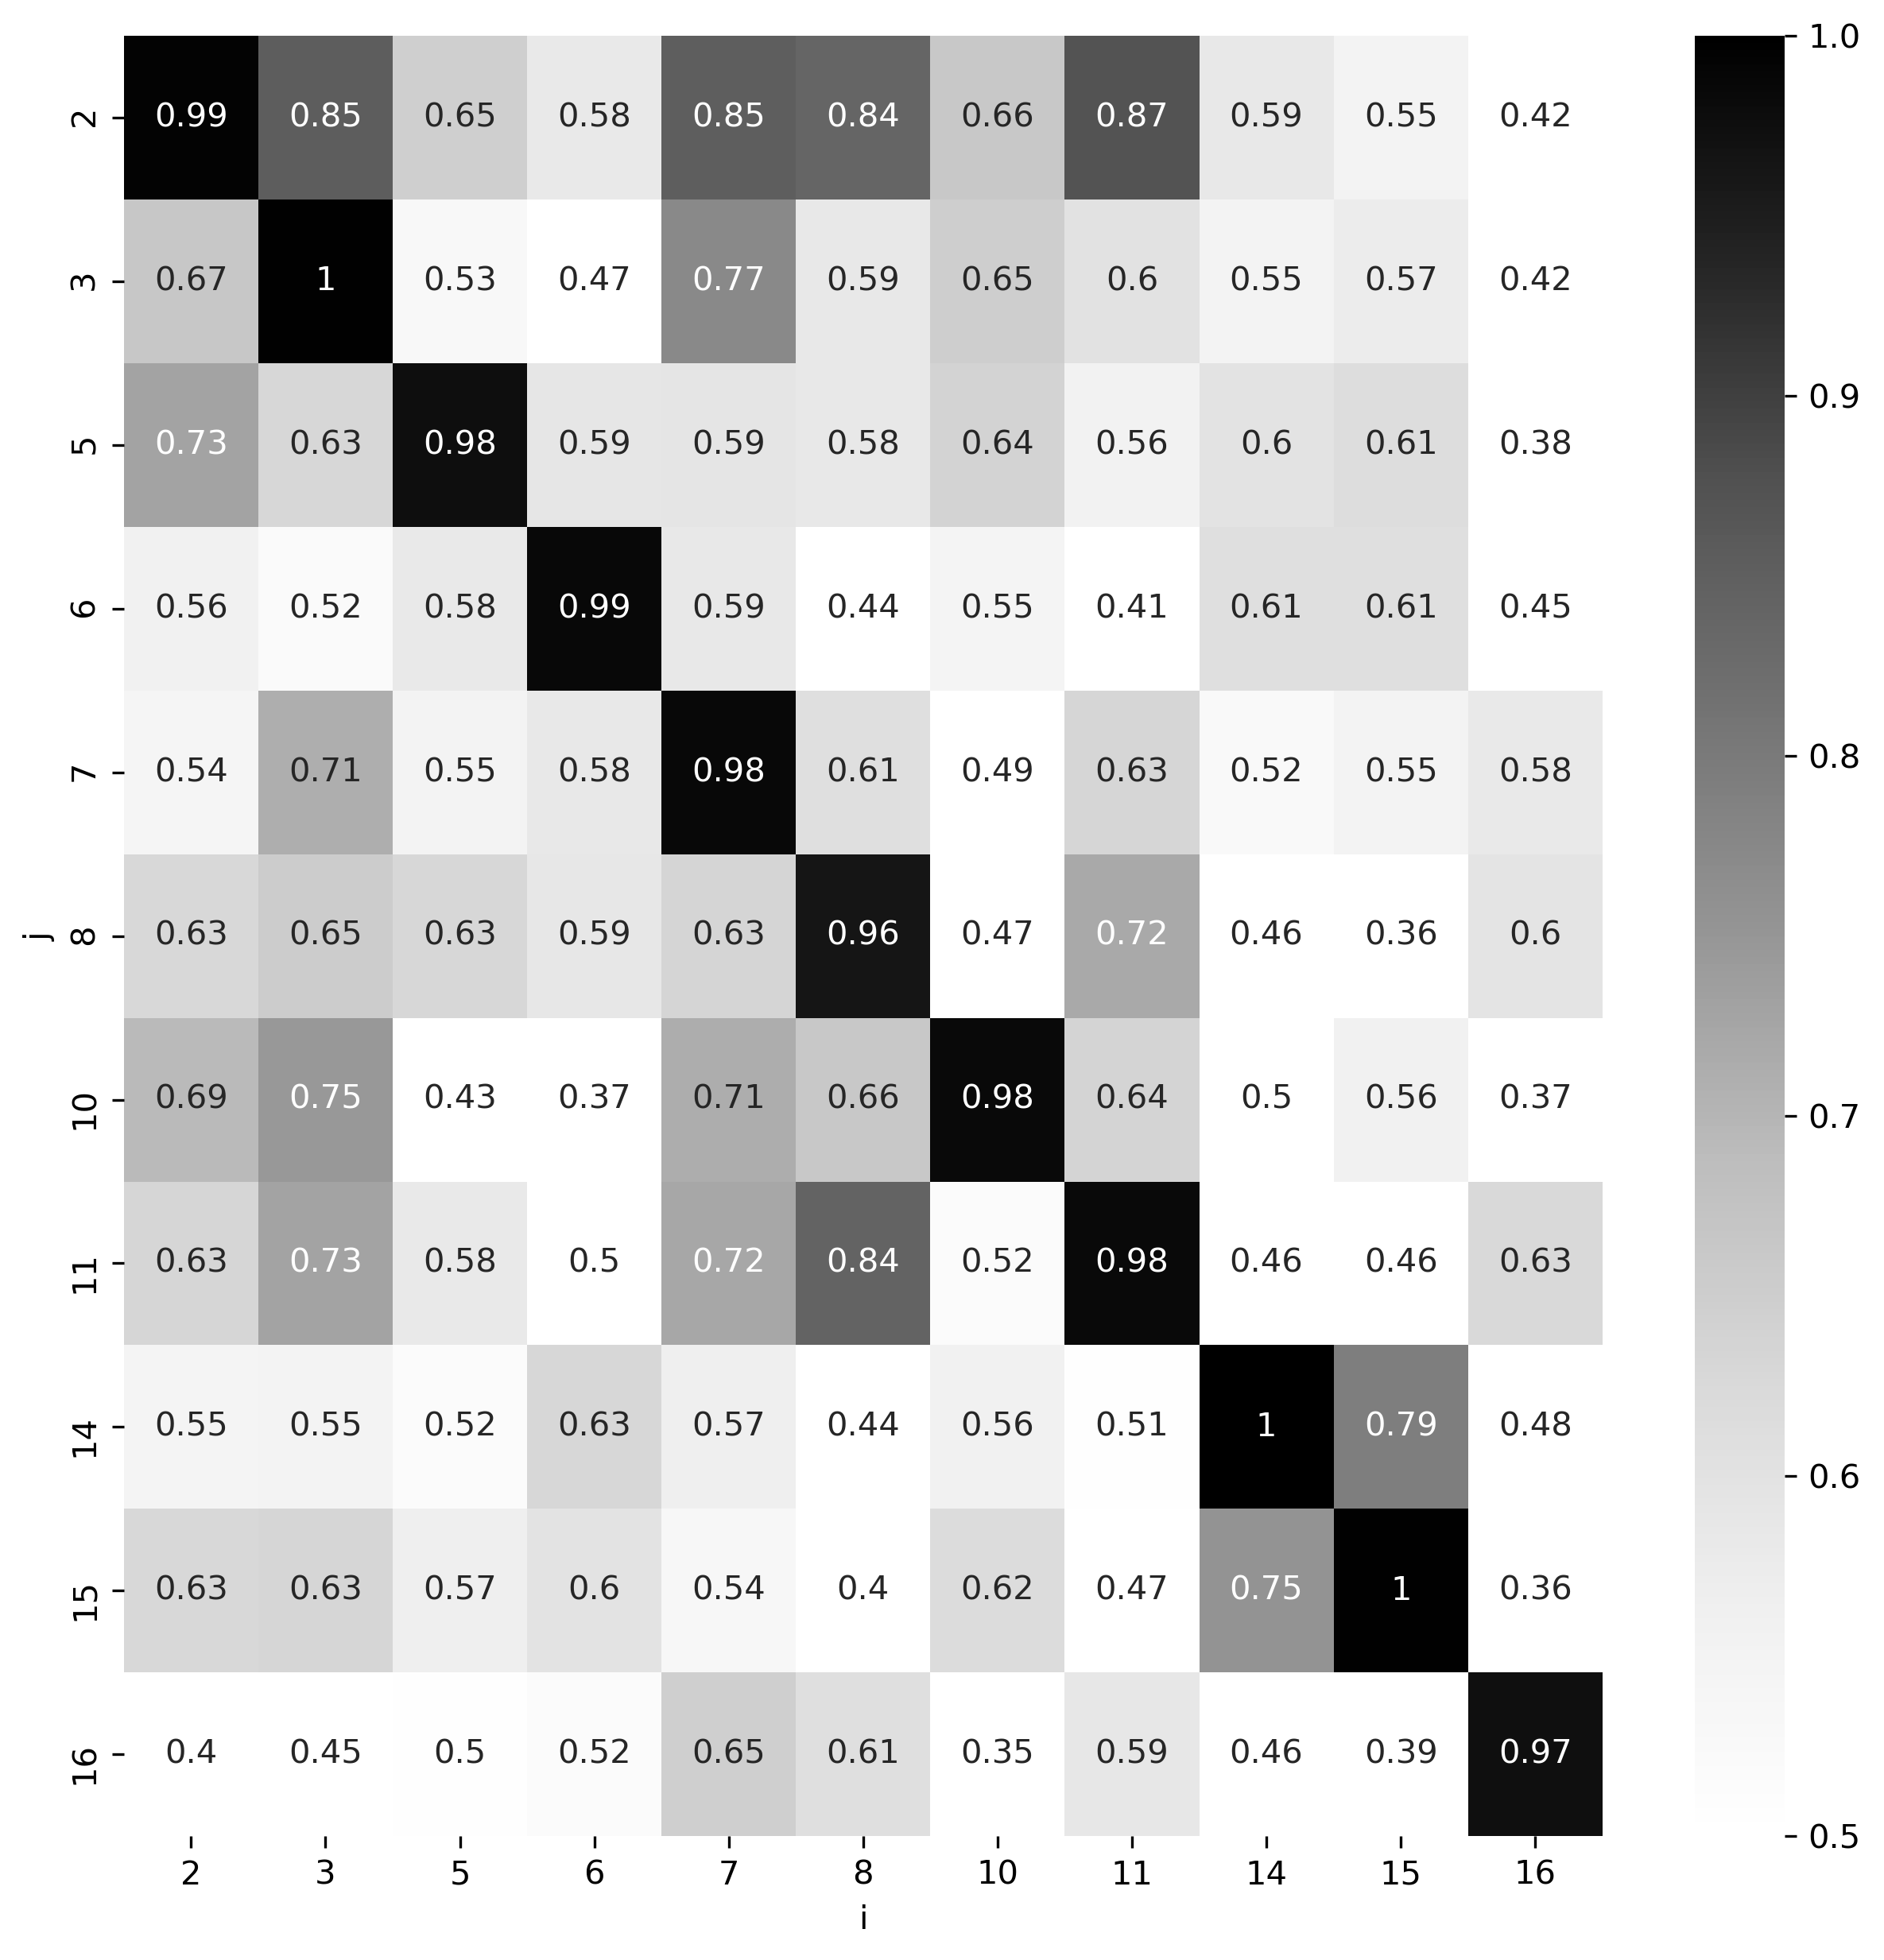

ba


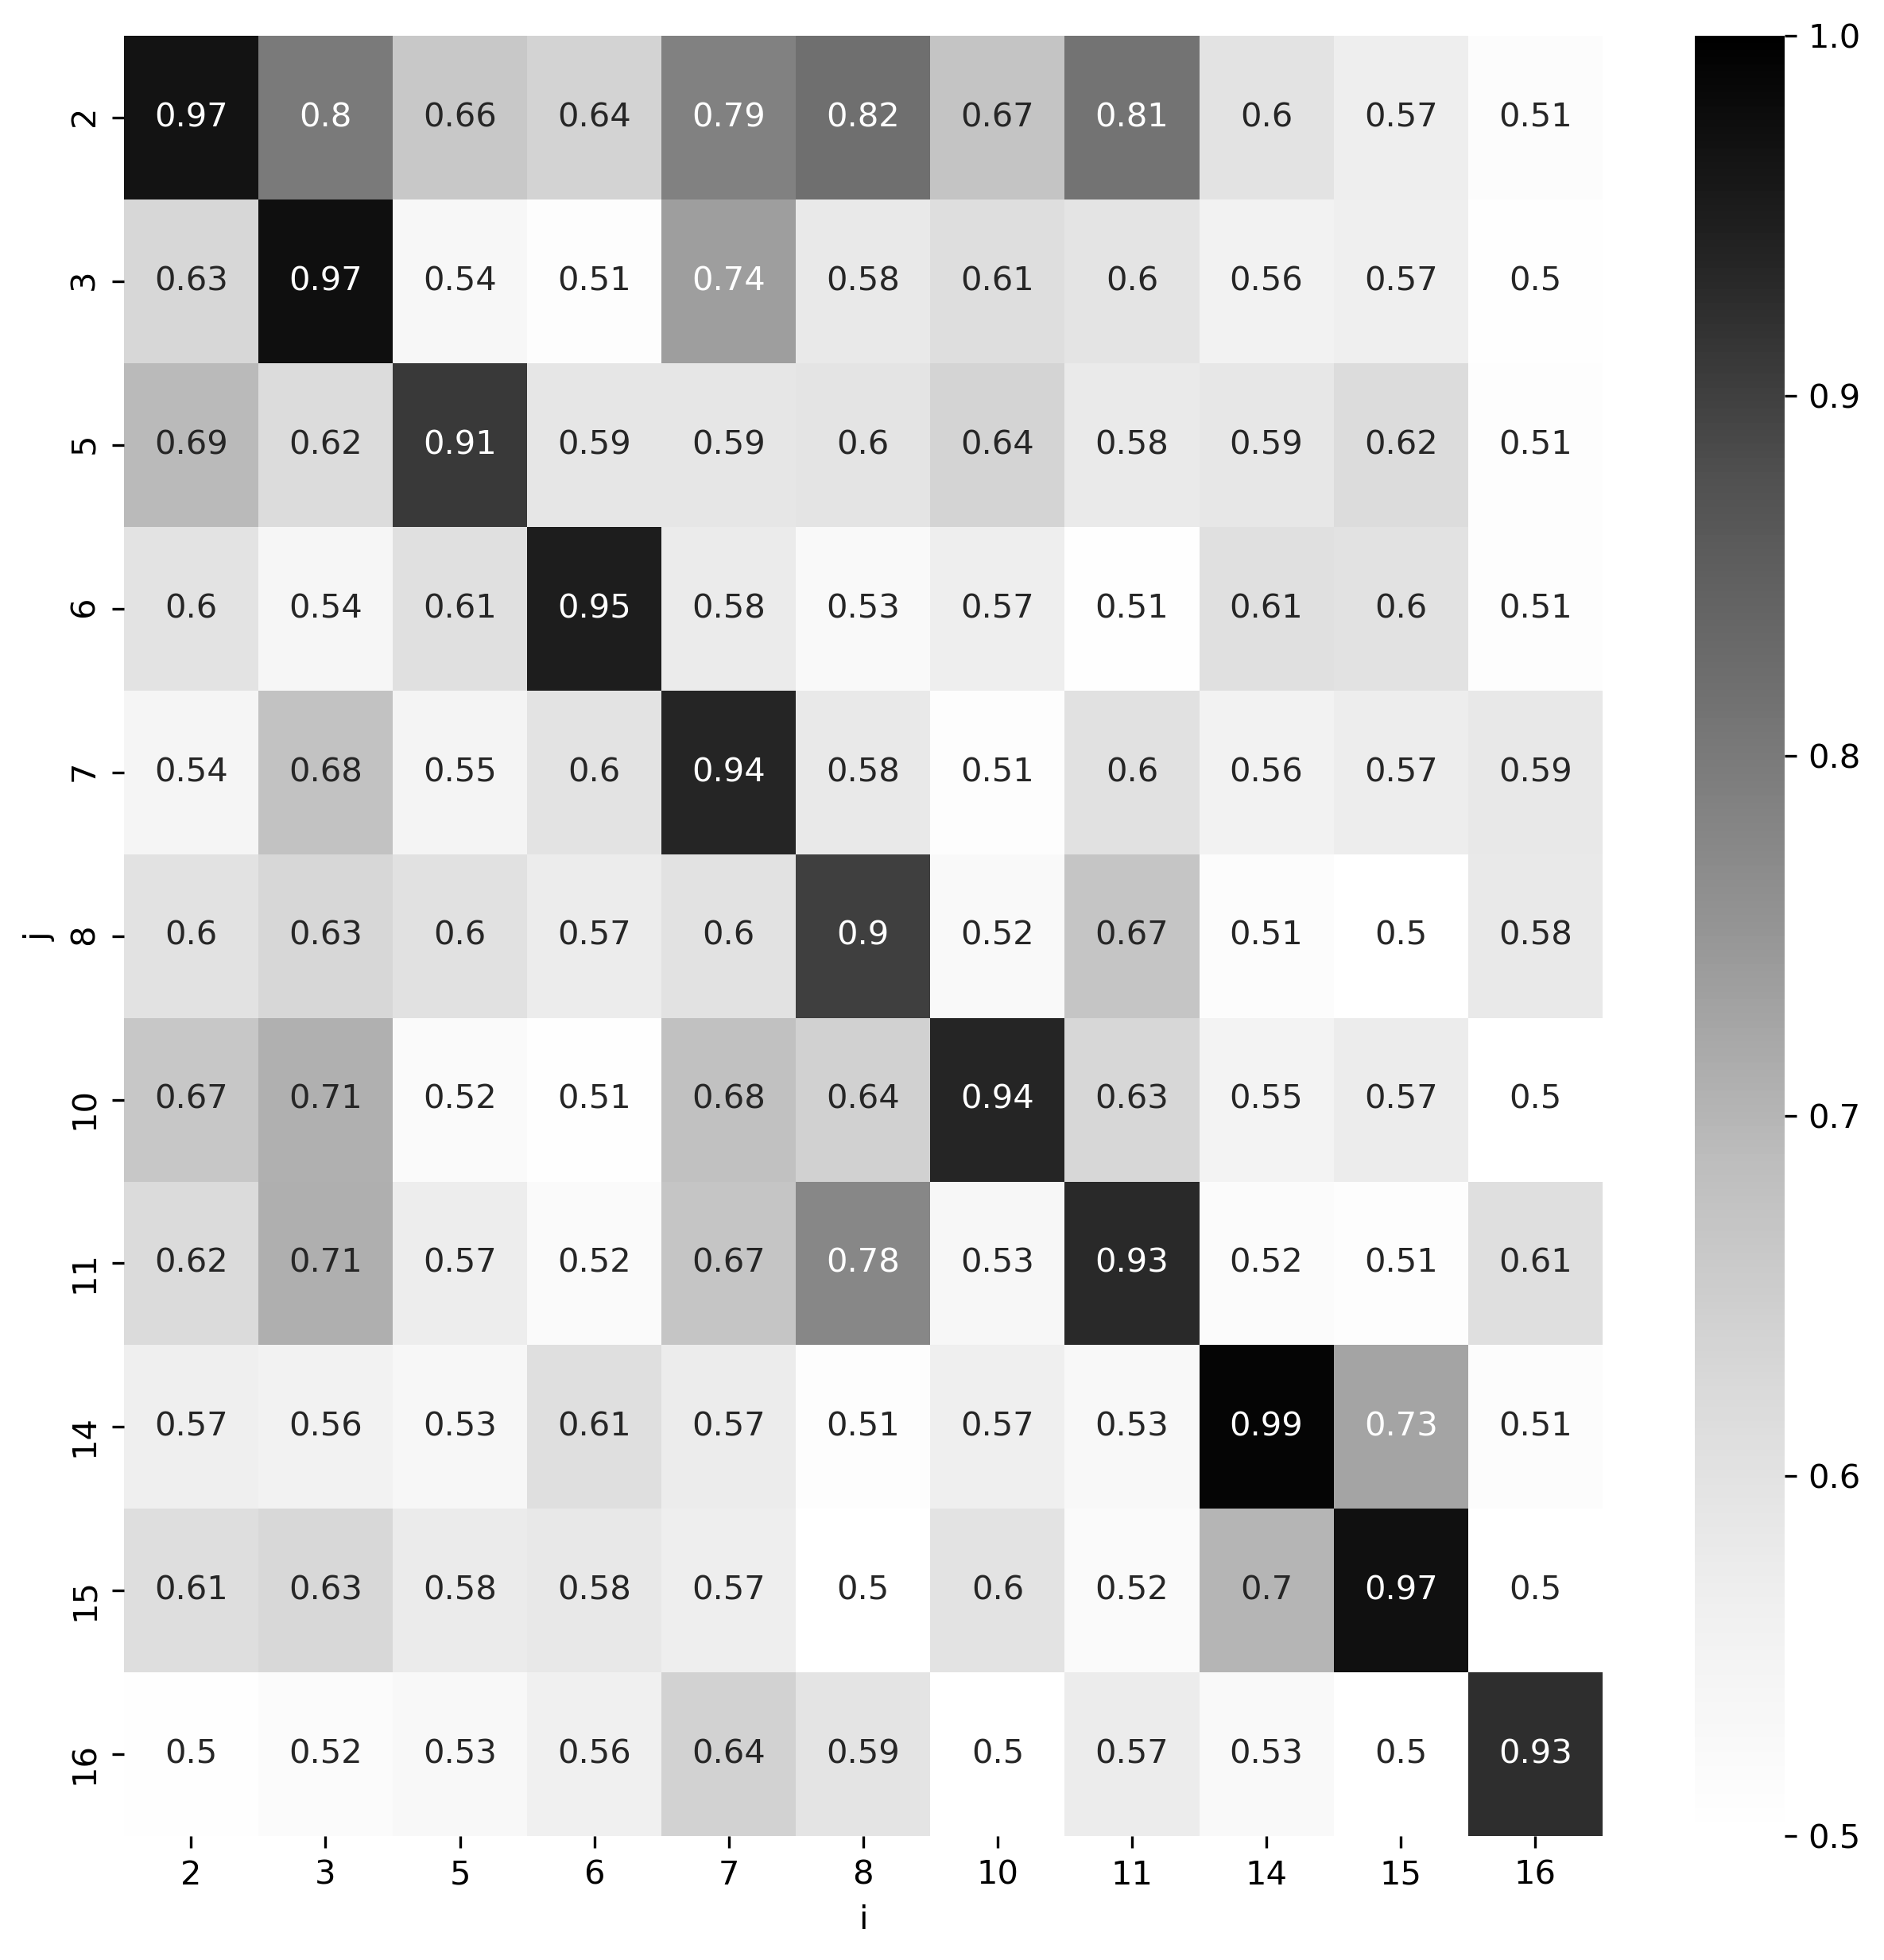

In [24]:
results= pd.read_csv("Results_all_proxy_datasets_from_other_prxydatasets.csv")
    
import seaborn as sns

#Anything less than 0.50 is also white (which is worse than a random model)

for metric in ["auc", "ba"]:
    heatmap = results.pivot(index='j', columns='i', values=metric)
    fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
    sns.heatmap(heatmap, cmap="Greys", vmin=0.50, vmax=1.00, annot=True)
    print(metric)
    plt.show()
    

pos_LR


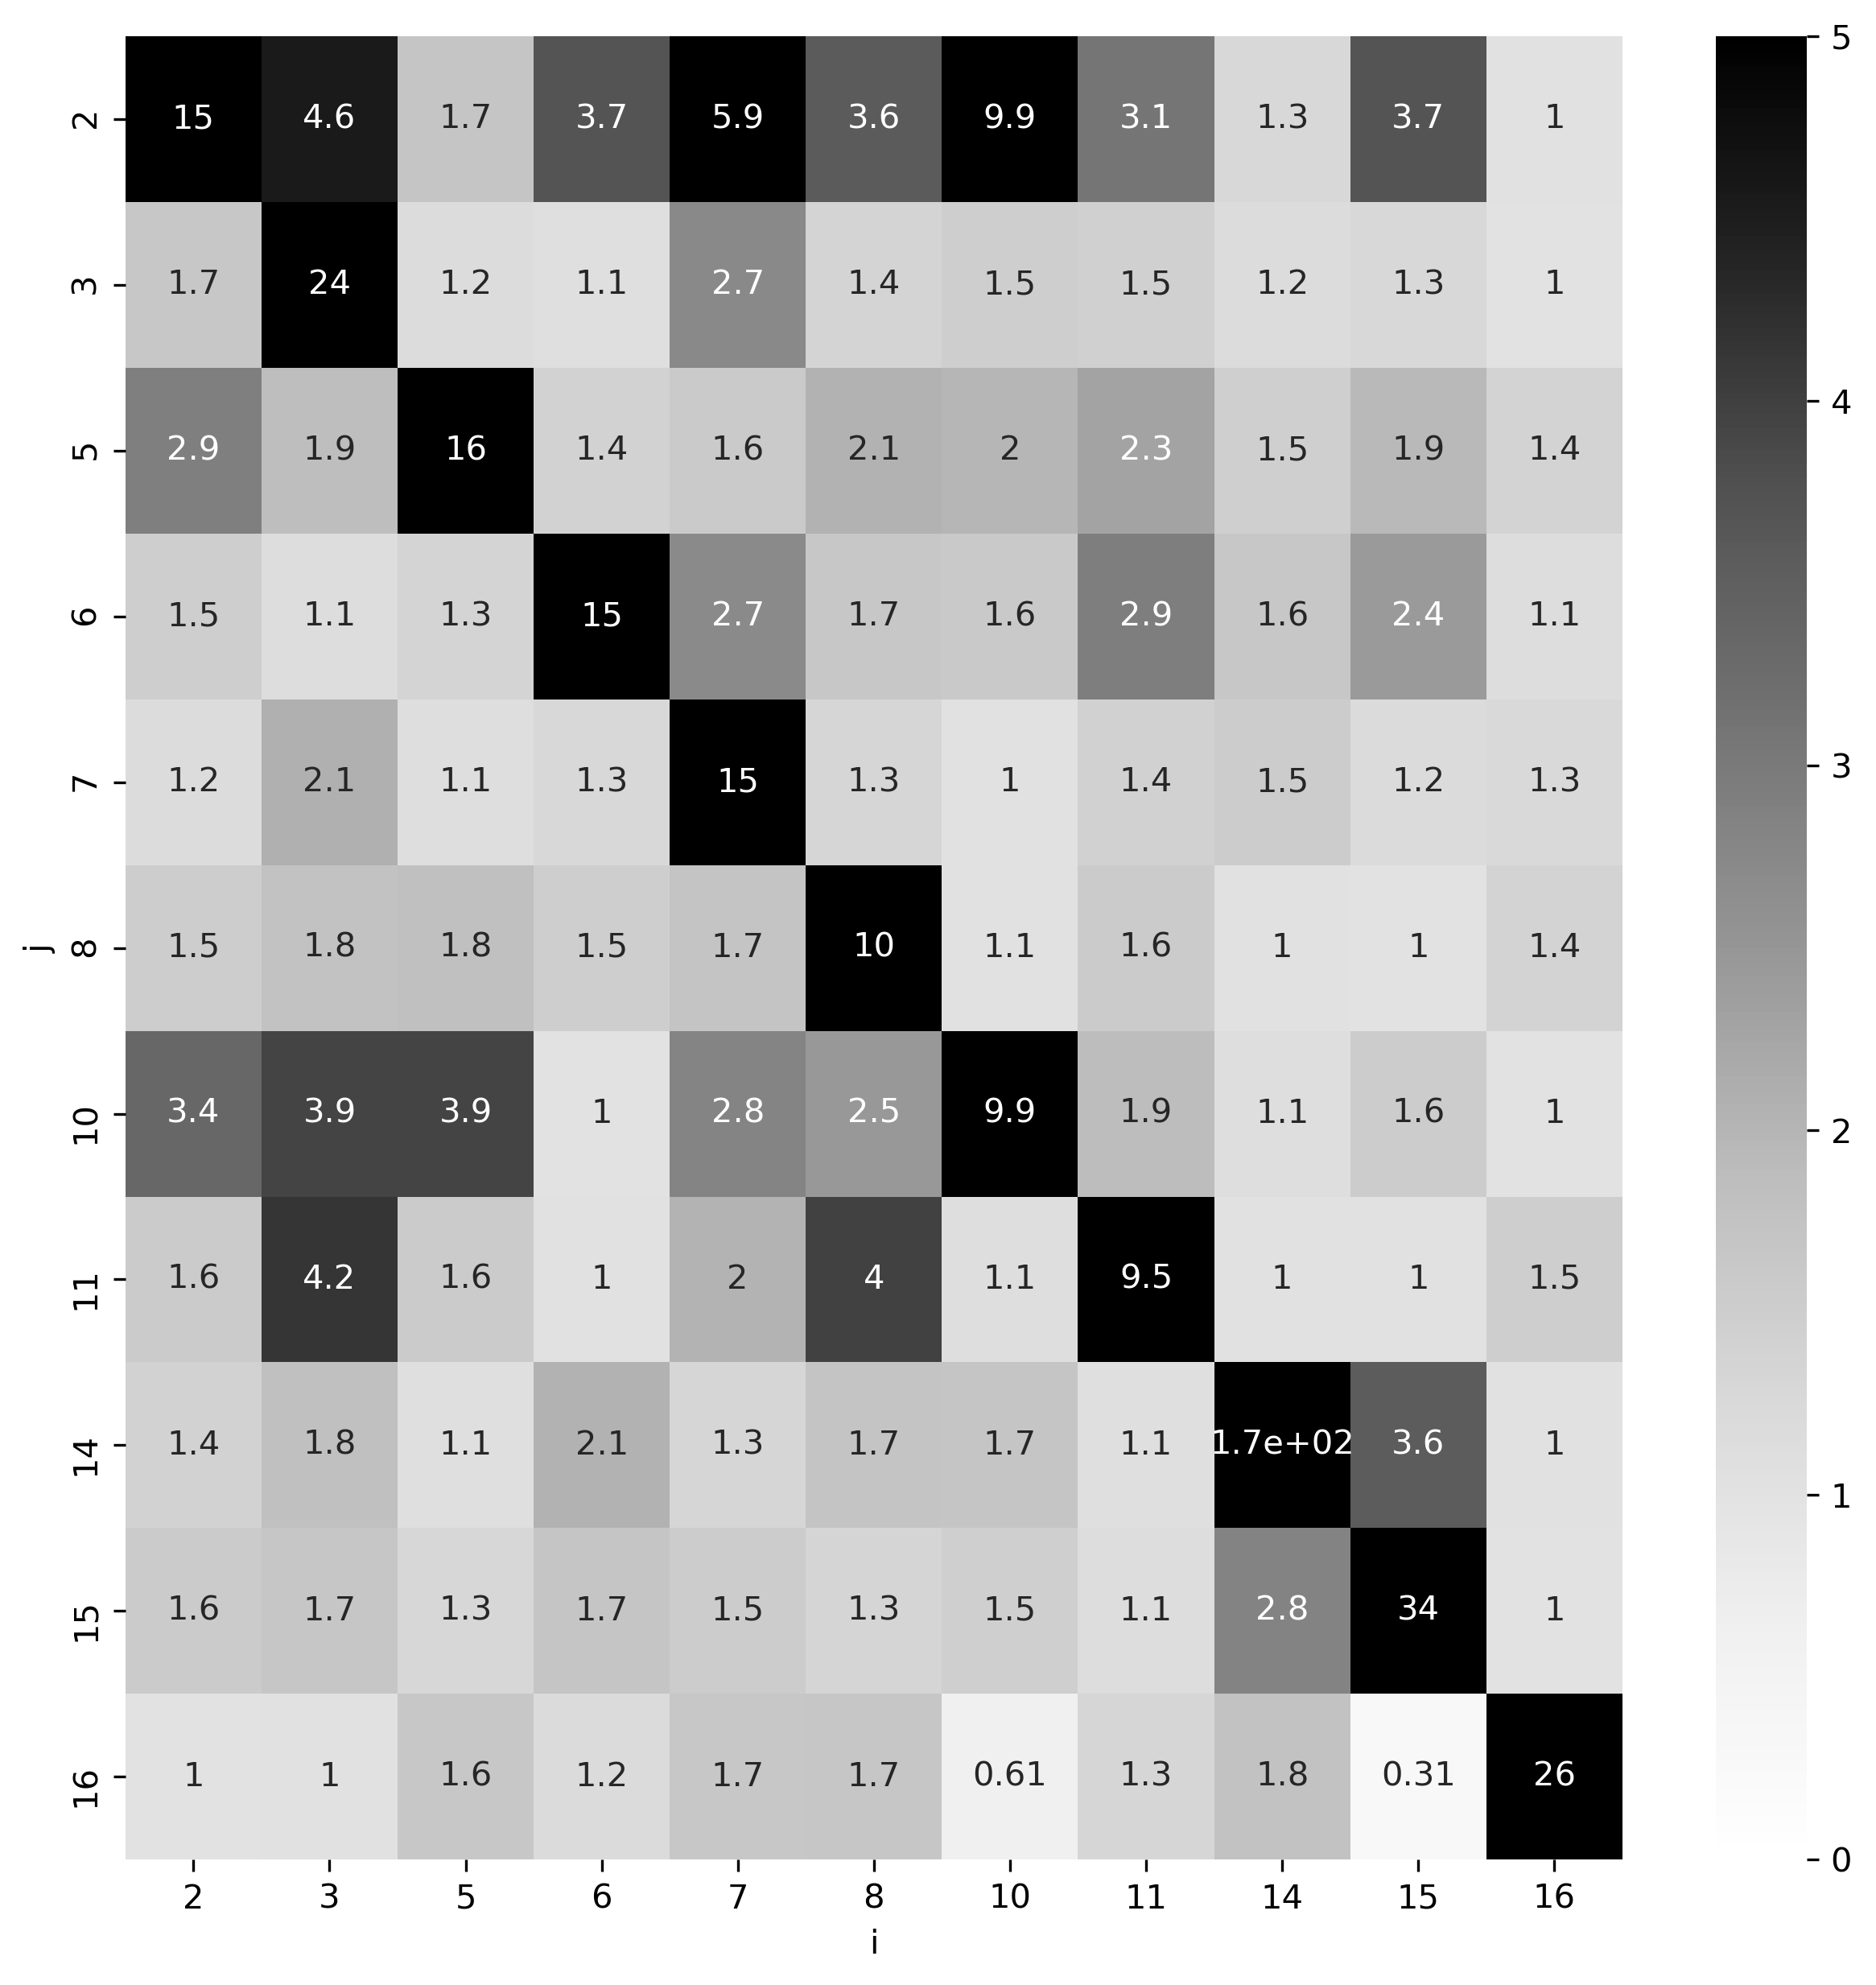

In [25]:
results= pd.read_csv("Results_all_proxy_datasets_from_other_prxydatasets.csv")
    
import seaborn as sns

#Anything less than 0.50 is also white (which is worse than a random model)

for metric in ["pos_LR"]:
    heatmap = results.pivot(index='j', columns='i', values=metric)
    fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
    sns.heatmap(heatmap, cmap="Greys", vmin=0, vmax=5.00, annot=True)
    print(metric)
    plt.show()

In [26]:
test_data_ncv= pd.read_csv("../test_data_ncv_DILIst_1020.csv")

test_data_ncv = test_data_ncv[all_features]

y_ncv = np.array(test_data_ncv['TOXICITY'])
test_features= test_data_ncv.drop(["TOXICITY", "smiles_r", "Source_rank", "Source", "Data"] , axis = 1)

test_feature_list = list(test_features.columns)
X_ncv = np.array(test_features)

In [27]:
test_data_heldouttest= pd.read_csv("../test_data_heldouttest_DILIst_255.csv")

test_data_heldouttest = test_data_heldouttest[all_features]

y_diliheldouttest = np.array(test_data_heldouttest['TOXICITY'])
test_features= test_data_heldouttest.drop(["TOXICITY", "smiles_r", "Source_rank", "Source", "Data"] , axis = 1)

test_feature_list = list(test_features.columns)
X_diliheldouttest = np.array(test_features)

In [28]:
#Predict all DILI with models built on one of the individual Liv datasets

list_of_lists=[]
import pickle

for i in all_sources_list: 
    
    print(i)
    
    classifier = pickle.load(open(f"../bestlivmodel_{i}_model.sav", 'rb'))
    

    inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) 
    #Find best threshold using NCV DIlI compounds
    cross_val_prob_cp = cross_val_predict(classifier, X_ncv, y_ncv, cv=inner_cv, method='predict_proba', n_jobs=-1)[:, 1]
    # calculate roc curves
    fpr, tpr, thresholds = roc_curve(y_ncv, cross_val_prob_cp)
    # get the best threshold
    J = tpr - fpr
    ix = argmax(J)
    best_thresh = thresholds[ix]
    print('Best Threshold=%f' % (best_thresh))
    
    #Comapre for held out test set
    y_proba = classifier.predict_proba(X_diliheldouttest)[:,1]
    y_pred  = [ 1 if x>best_thresh  else 0 for x in y_proba ]

    conf_matrix = confusion_matrix(y_diliheldouttest, y_pred)
    print(conf_matrix)
    print(classification_report(y_diliheldouttest, y_pred))
    ba= balanced_accuracy_score(y_diliheldouttest, y_pred)
    print('balanced_accuracy_score ',ba)
    mcc= matthews_corrcoef(y_diliheldouttest, y_pred)
    print('matthews_corrcoef ',mcc)

    # Sensitivity, hit rate, recall, or true positive rate
    Sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
    # Specificity or true negative rate
    Specificity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]) 
    
    f1= metrics.f1_score(y_diliheldouttest, y_pred)
    pos_LR = Sensitivity / (1 - Specificity) 
    ppv= metrics.precision_score(y_diliheldouttest, y_pred, average='binary')

    print("Sensitivity", Sensitivity)
    print("Specificity", Specificity)
    print("f1", f1)
    print("LR+", pos_LR)
    print("ppv", ppv)

    average_precision_score=metrics.average_precision_score(y_diliheldouttest, y_proba)
    print("average_precision_score", average_precision_score)
        
        
    auc=roc_auc_score(y_diliheldouttest, y_proba)
    print("roc_auc_score", auc)    
    
    row = [i, ba, mcc, auc, Sensitivity, Specificity, f1, pos_LR, ppv, average_precision_score, 
           np.array(y_pred), np.array(y_proba)]
    list_of_lists.append(row)

2
Best Threshold=0.632511
[[ 48  43]
 [ 46 118]]
              precision    recall  f1-score   support

           0       0.51      0.53      0.52        91
           1       0.73      0.72      0.73       164

    accuracy                           0.65       255
   macro avg       0.62      0.62      0.62       255
weighted avg       0.65      0.65      0.65       255

balanced_accuracy_score  0.6234923612972394
matthews_corrcoef  0.24526515151482778
Sensitivity 0.5274725274725275
Specificity 0.7195121951219512
f1 0.726153846153846
LR+ 1.8805542283803152
ppv 0.7329192546583851
average_precision_score 0.7465707279161033
roc_auc_score 0.6718708121147146
3
Best Threshold=0.705417
[[62 29]
 [84 80]]
              precision    recall  f1-score   support

           0       0.42      0.68      0.52        91
           1       0.73      0.49      0.59       164

    accuracy                           0.56       255
   macro avg       0.58      0.58      0.55       255
weighted avg       

In [29]:
results  = pd.DataFrame(list_of_lists, columns=["i", "ba", "mcc", "auc", "Sensitivity", "Specificity", "f1", "pos_LR", "ppv", "average_precision_score",
                                                "y_pred", "y_proba"])
results.to_csv("Results_DILI_from_individual_proxydatasets.csv", index=False)
results

,i,ba,mcc,auc,Sensitivity,Specificity,f1,pos_LR,ppv,average_precision_score,y_pred,y_proba
0,2,0.623492,0.245265,0.671871,0.527473,0.719512,0.726154,1.880554,0.732919,0.746571,"[0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.30525258157812, 0.8063894956409088, 0.58398..."
1,3,0.584562,0.163779,0.631600,0.681319,0.487805,0.586081,1.330194,0.733945,0.730713,"[0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, ...","[0.4990937301232923, 0.5678090599372747, 0.551..."
2,5,0.498760,-0.006813,0.558362,0.967033,0.030488,0.058140,0.997443,0.625000,0.682094,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.22034974012977482, 0.6410959908942326, 0.09..."
3,6,0.484689,-0.051211,0.508376,0.890110,0.079268,0.139037,0.966742,0.565217,0.645232,"[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0.2887078566941651, 0.778160388701243, 0.4228..."
4,7,0.620410,0.247810,0.668789,0.472527,0.768293,0.745562,2.039329,0.724138,0.773968,"[0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, ...","[0.5422747063421852, 0.8559553423605252, 0.430..."
5,8,0.548713,0.123525,0.621415,0.890110,0.207317,0.326923,1.122908,0.772727,0.751378,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, ...","[0.33271492494199956, 0.5056573316773607, 0.46..."
6,10,0.552332,0.116886,0.624497,0.824176,0.280488,0.407080,1.145465,0.741935,0.735180,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, ...","[0.29418079335129554, 0.4797694351506046, 0.54..."
7,11,0.535915,0.097706,0.631734,0.901099,0.170732,0.278607,1.086619,0.756757,0.740003,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0.2537504619466536, 0.5072224760577093, 0.414..."
8,14,0.561445,0.127317,0.598030,0.769231,0.353659,0.477366,1.190131,0.734177,0.728125,"[0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, ...","[0.026996581115675888, 0.8917072367808511, 0.2..."
9,15,0.498157,-0.012734,0.607679,0.978022,0.018293,0.035503,0.996246,0.600000,0.716682,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, ...","[0.06780071002464581, 0.30672107473744314, 0.1..."


In [30]:
#results = pd.read_csv("Results_DILI_from_individual_proxydatasets.csv")

list_of_lists_jaccard=[]
from sklearn.metrics import jaccard_score

for i in all_sources_list:
    for j in all_sources_list:
        jacccard = jaccard_score(results[results["i"]==i]["y_pred"].iloc[0], results[results["i"]==j]["y_pred"].iloc[0])
        row = [i, j, jacccard]
        list_of_lists_jaccard.append(row)

In [31]:
jaccard_df = pd.DataFrame(list_of_lists_jaccard, columns=["i", "j", "jacccard"])
jaccard_df

,i,j,jacccard
0,2,2,1.000000
1,2,3,0.578947
2,2,5,0.030488
3,2,6,0.082353
4,2,7,0.691919
...,...,...,...
116,16,10,0.000000
117,16,11,0.131579
118,16,14,0.000000
119,16,15,0.000000


In [32]:
jaccard_df.describe()

,i,j,jacccard
count,121.000000,121.000000,121.000000
mean,8.818182,8.818182,0.205752
std,4.588028,4.588028,0.294250
min,2.000000,2.000000,0.000000
25%,5.000000,5.000000,0.015152
50%,8.000000,8.000000,0.076503
75%,14.000000,14.000000,0.242105
max,16.000000,16.000000,1.000000


jacccard


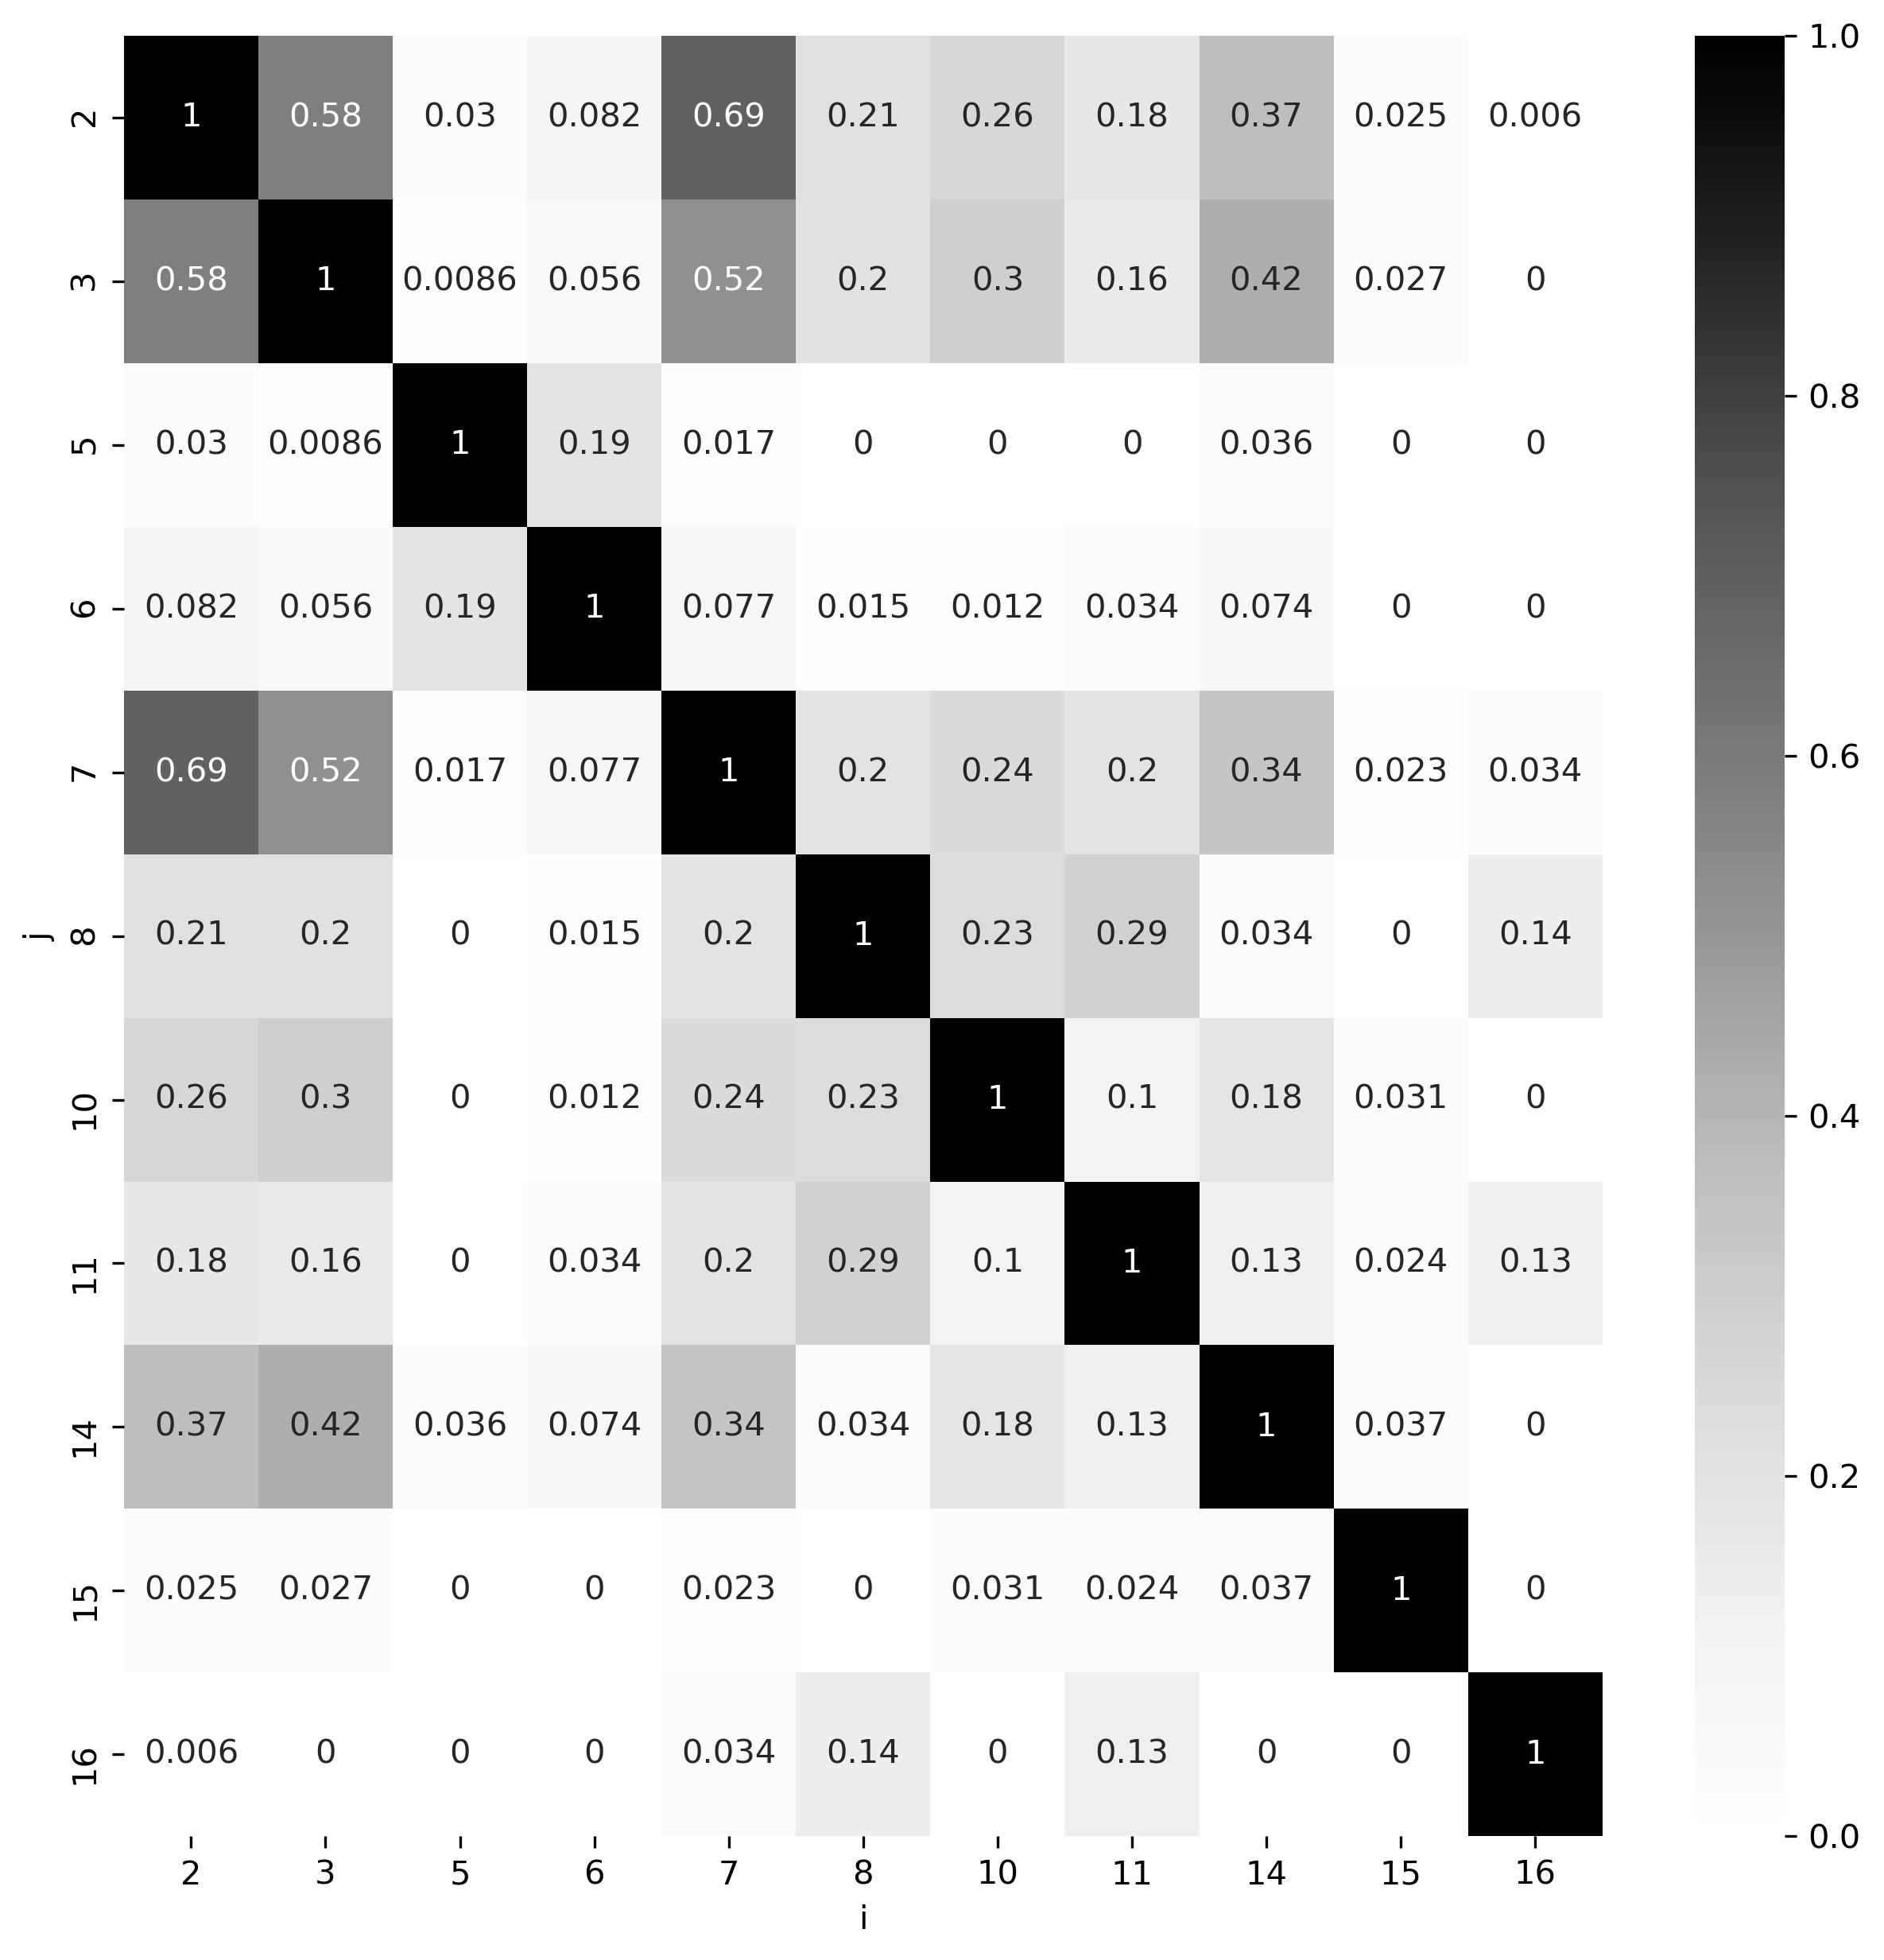

In [33]:
for metric in ["jacccard"]:
    heatmap = jaccard_df.pivot(index='j', columns='i', values=metric)
    fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
    sns.heatmap(heatmap, cmap="Greys", vmin=0.0, vmax=1.00, annot=True)
    print(metric)
    plt.show()